In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Sample data

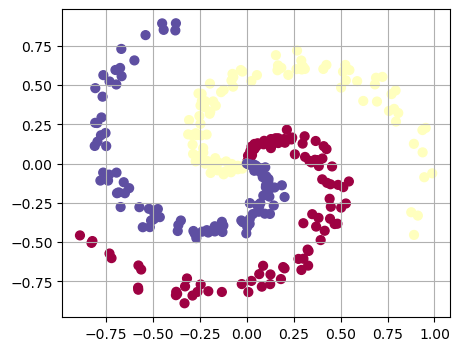

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
total_n = N*K
X = np.zeros((total_n,D)) 
y = np.zeros(total_n, dtype='uint8') 
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) 
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.grid()

# Training a softmax linear classifier
- forward -> backward -> update step

In [53]:
# Initialize the parameters
np.random.seed(49)
w1 = np.random.randn(D,K)
b1 = np.random.randn(1, K)

In [54]:
reg = 1e-2
lr = 5e-3
softmax = lambda x : np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

In [55]:
for i in range(20000):

# Forward
    logit = X.dot(w1)+b1 # logit
    probs = softmax(logit) # classes probability
    data_loss = np.average(-np.log(probs[range(total_n), y]))# cross entropy loss
    reg_loss = 0.5*reg*np.sum(w1*w1) # regularization weight decay
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print(f"iteration {i}: {loss:.4f}")

    # Backward
    dLdf = probs
    dLdf[range(total_n), y] -= 1
    dLdf /= total_n # sum gradient and average it 
    dLdw1 = X.T.dot(dLdf)
    dLdb1 = np.sum(dLdf, axis=0, keepdims=True)
    dLdw1 += reg*w1 # don't forget regularization gradient

    # update step
    w1 += -lr*dLdw1
    b1 += -lr*dLdb1

iteration 0: 1.7869
iteration 1000: 1.3489
iteration 2000: 1.1180
iteration 3000: 0.9960
iteration 4000: 0.9297
iteration 5000: 0.8920
iteration 6000: 0.8696
iteration 7000: 0.8558
iteration 8000: 0.8470
iteration 9000: 0.8413
iteration 10000: 0.8375
iteration 11000: 0.8349
iteration 12000: 0.8332
iteration 13000: 0.8319
iteration 14000: 0.8311
iteration 15000: 0.8305
iteration 16000: 0.8300
iteration 17000: 0.8297
iteration 18000: 0.8295
iteration 19000: 0.8293


In [56]:
pred_logits = np.dot(X, w1) + b1
pred_probs = np.argmax(pred_logits, axis=1)
pred_probs, y

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 

# Training a softmax linear classifier (hidden layer)
- forward -> backward -> update step

In [86]:
# Initialize the parameters
np.random.seed(49)
h = 100
w1 = np.random.randn(D, h)
b1 = np.random.randn(1, h)
w2 = np.random.randn(h, K)
b2 = np.random.randn(1, K)

In [87]:
reg = 1e-3
lr = 5e-2
softmax = lambda x : np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

In [88]:
w1.shape, b1.shape, w2.shape, b2.shape

((2, 100), (1, 100), (100, 3), (1, 3))

In [90]:
for i in range(25000):
    # forward
    h1 = np.maximum(0, X.dot(w1)+b1) # hidden layer and relu
    logit = h1.dot(w2)+b2 # logit
    probs = softmax(logit) # classes probability
    data_loss = np.average(-np.log(probs[range(total_n), y]))# cross entropy loss
    reg_loss = 0.5*reg*np.sum(w1*w1) + 0.5*reg*np.sum(w2*w2) # regularization weight decay
    loss = data_loss + reg_loss 
    if i % 1000 == 0:
        print(f"Iteration {i}: {loss:.4f}")

    # backward
    dLdf2 = probs 
    dLdf2[range(total_n), y] -= 1
    dLdf2 /= total_n

    dLdw2 = h1.T.dot(dLdf2)
    dLdb2 = np.sum(dLdf2, axis=0, keepdims=True)

    dLdr = dLdf2.dot(w2.T)
    dLdr[h1 <= 0] = 0
    dLdf1 = dLdr
    dLdw1 = X.T.dot(dLdf1)
    dLdb1 = np.sum(dLdf1, axis=0, keepdims=True)

    dLdw1 += reg*w1 # don't forget regularization gradient
    dLdw2 += reg*w2

    # update step
    w1 += -lr*dLdw1
    b1 += -lr*dLdb1
    w2 += -lr*dLdw2
    b2 += -lr*dLdb2

Iteration 0: 4.2018
Iteration 1000: 0.4471
Iteration 2000: 0.3966
Iteration 3000: 0.3695
Iteration 4000: 0.3516
Iteration 5000: 0.3381
Iteration 6000: 0.3270
Iteration 7000: 0.3176
Iteration 8000: 0.3095
Iteration 9000: 0.3023
Iteration 10000: 0.2960
Iteration 11000: 0.2903
Iteration 12000: 0.2853
Iteration 13000: 0.2808
Iteration 14000: 0.2767
Iteration 15000: 0.2731
Iteration 16000: 0.2699
Iteration 17000: 0.2669
Iteration 18000: 0.2643
Iteration 19000: 0.2619
Iteration 20000: 0.2597
Iteration 21000: 0.2577
Iteration 22000: 0.2559
Iteration 23000: 0.2543
Iteration 24000: 0.2528


In [91]:
h1 = np.maximum(0, X.dot(w1)+b1) # hidden layer and relu
logit = h1.dot(w2)+b2 # logit
probs = softmax(logit) # classes probability
preds = np.argmax(probs, axis=1)
preds, y

(array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 